<a href="https://colab.research.google.com/github/Paavani-git/Computer_vision/blob/main/CV_LabSheet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 19ECE384 Computer Vision Programming Lab
## Labsheet #2
## Intensity Transformations on Images
Name: Poluru Pavani

Roll Number: AM.EN.U4EAC19041

-----
Intensity tranformation on images refers to changing the pixel intensity values of an input image for the purpose of image enhancement. Intensity transformations are used to produce an output image that is visually more appealing when compared to the input image, and/or better suited for further processing. In it's simplest form, an intensity transformation algorithm produces a pixel value $s$ at a spatial coordinate $(x_0,y_0)$ of the output image, by transforming the pixel value $r$ at the same spatial coordinate $(x_0,y_0)$ of the input image. This transformation can be represented as,$$s = T[r],$$ where, $T[.]$ denotes the transformation applied on the input pixel value $r$. In this simple intensity tranformation, the pixel value at a given coordinate $(x_0,y_0)$ of the output image depends only on the pixel value at teh same coordinate of the input image. In a more general set up, the pixel value at a given spatial coordinate $(x_0,y_0)$ of the output image may depend on several pixel values at different coordinates (sometimes a neighborhood of pixels around $(x_0,y_0)$ as shown below.

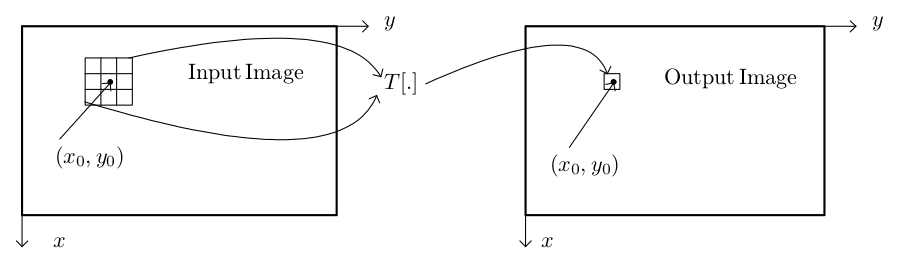

In this labsheet, we will mostly focus on the simple intensity transformations of the form $s=T[r]$, though some of the exercises belong to the latter class. In the following, we assume that a pixel can take $L$ values in the range $[0,L-1]$. As we use images whose pixel values are encoded as 8 bit unsigned integers, take $L=256$ in all the exercises.
### Exercise 1. Negative of an Image
The following transformation produces an output image which closely resembles the negative image captured by the old film based cameras.
$$s = L-1-r$$
Note that, the above transformation changes an input pixel value $0$ into $255$, $1$ into $254$, and so on.
#### Steps
1. Initialize an output image of same size as that of input image, and with all pixel values set to zero. 
2. Iterate through each of the pixel values of the input image using two nested for loops.
2. At each of the spatial coordinates, apply the above transformation on the intensity value to compute the pixel value at the same coordinate of the output image.

A sample input image and it's negative are shown below. Write your code for generating the negative of an image in the Code Cell given below.

#### Input Image

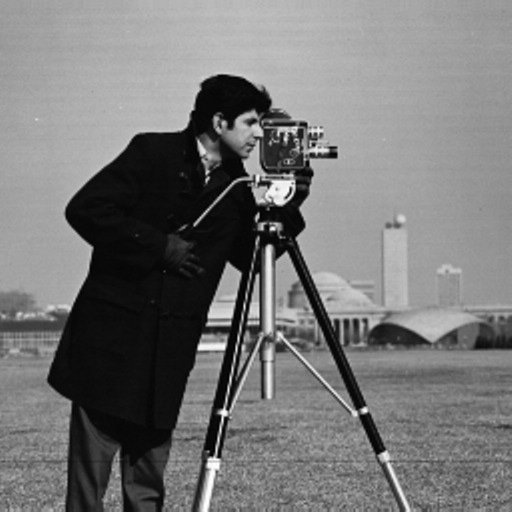

#### Output Image (Negative)

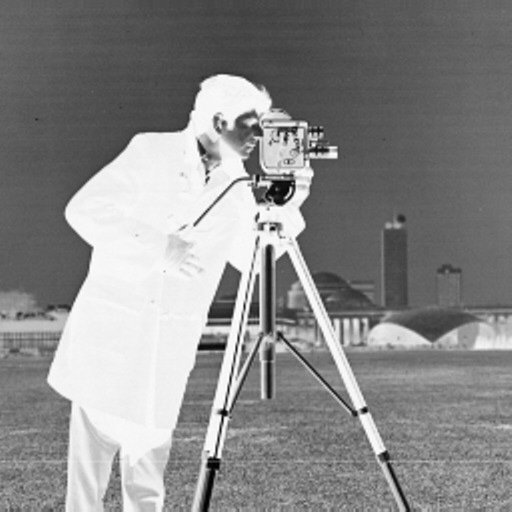

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


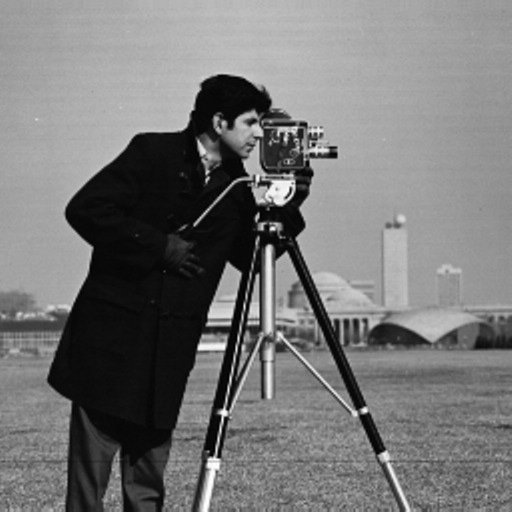

Negetive image


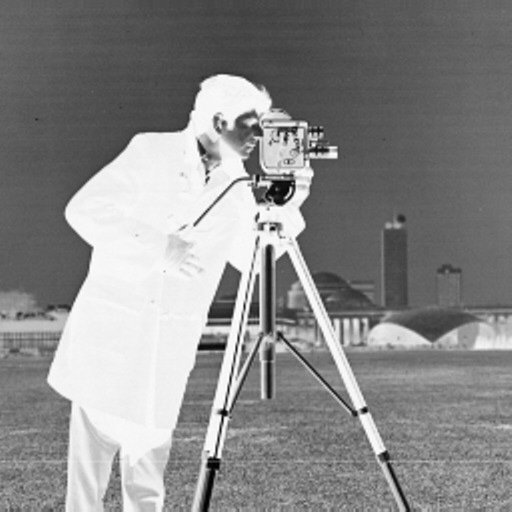

In [ ]:
# Negative image
I = cv2.imread('/content/gdrive/MyDrive/Computer vision/cameraman.jpg',0); 
cv2_imshow(I)
I.shape
J = np.zeros((I.shape[0],I.shape[1]));
for m in range(0,I.shape[0]):
  for n in range(0,I.shape[1]):
    J[m,n] = 256-1-I[m,n];
    # print(J[m,n])
print("Negetive image")
cv2_imshow(J);

### Exercise 2. Log Transformation
The Log transformation converts a pixel value $r$ from the input image, into a value $s$ as,
$$s = c\ \mathrm{log}(1+r),$$
where, $c$ is a constant, and, the input pixel value $r\geq0$. The Log transformation is generally used for transforming a narrow range of pixel values into a wide range. For example, we can use Log transformation for expanding a narrow range of dark pixel values into a wider range, producing an image that looks visually more bright. The value of $c$ is chosen such that the transformed image is visually more appealing when compared with the input.
#### Steps
1. Initialize an output image of same size as that of input image, and with all pixel values set to zero. 
2. Iterate through each of the pixel values of the input image using two nested for loops.
2. At each of the spatial coordinates, apply the above transformation on the intensity value to compute the pixel value at the same coordinate of the output image. Choose $c=75$.

A sample input image and it's Log transform are shown below. Write your code for Log transformation in the Code Cell given below.

#### Input Image

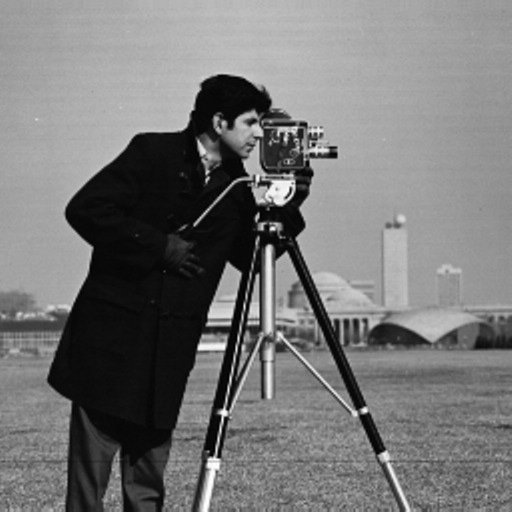

#### Output Image (Log Transformation)

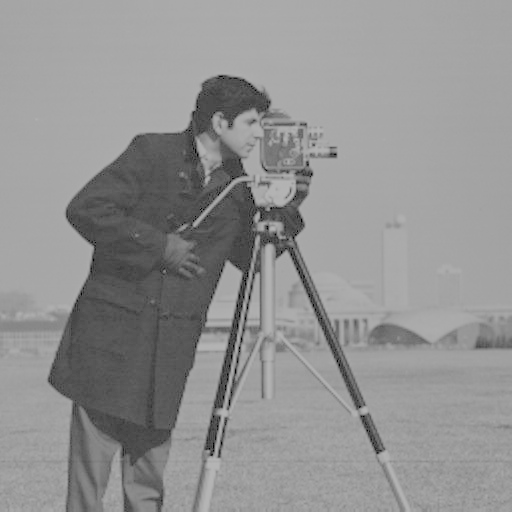

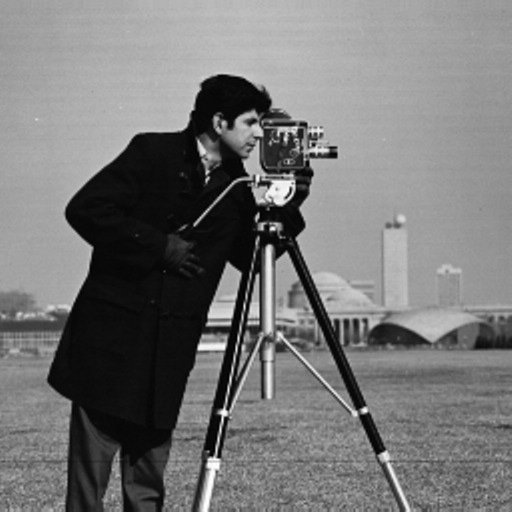

Transformed image:


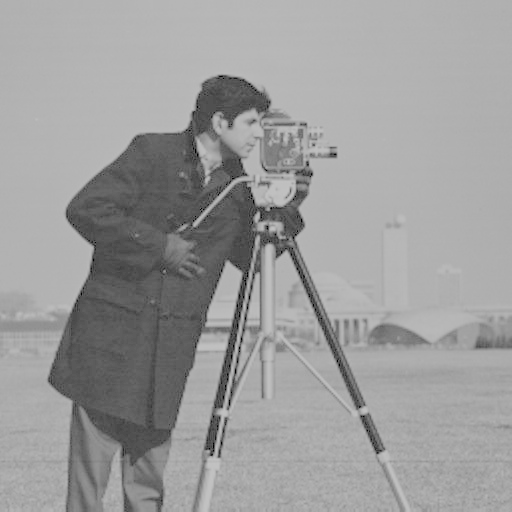

In [ ]:
I = cv2.imread('/content/gdrive/MyDrive/Computer vision/cameraman.jpg',0); 
cv2_imshow(I)
I.shape
J = np.zeros((I.shape[0],I.shape[1]));
c = 35
for m in range(0,I.shape[0]):
  for n in range(0,I.shape[1]):
    J[m,n] = c*np.log(1+I[m,n])
print("Transformed image:")
cv2_imshow(J)

### Exercise 3. Power-Law Transformation
The power-law transformation is given as,
$$s = cr^\gamma,$$
where, $c$ and $\gamma$ are constants, and are selected to match the requirement of the transformation. The power-law transformation is commonly used to match the intensity values with the non-linear characteristics of certain devices that respond to the intensity values. For example, a Cathode Ray Tube (CRT) monitor commonly used as the output device of past generation computers have to produce a light intensity corresponding to the potential assigned for each pixel. But, CRT exhibits a non-linear (exponential) characteristics for a linear change in the input. Hence, for displaying a linear change in the intensity values, this linear change must be mapped to match the exponential characteristics of CRT, which then produces a linear change in the displayed intensity values. Such a mapping or correction is required in many printers also. This mapping process is called __gamma correction__. If the value of $\gamma$ is chosen to be a fractional value, narrow range of dark pixels are coverted into a wide range of bright pixels, whereas, the opposite effect happens when $\gamma > 1$.
#### Steps
1. Initialize an output image of same size as that of input image, and with all pixel values set to zero. 
2. Iterate through each of the pixel values of the input image using two nested for loops.
2. At each of the spatial coordinates, apply the above transformation on the intensity value to compute the pixel value at the same coordinate of the output image. Choose $c=1$ are repeat the exercise with $\gamma < 1$ and $\gamma > 1$.

A sample input image and it's power-law transformed version are shown below. Write your code for power-law transformation in the Code Cell given below.

#### Input Image

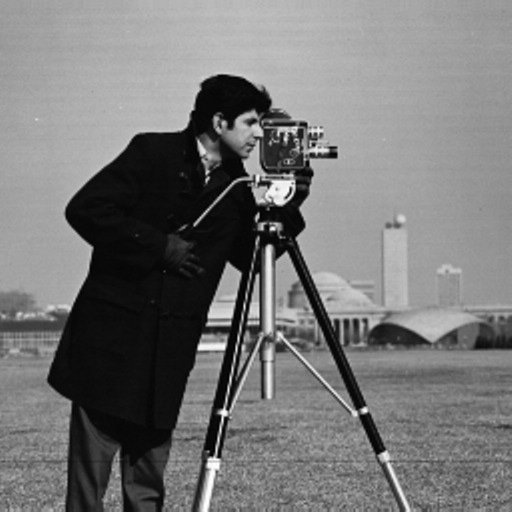

#### Output Image (Power Law Transformation)

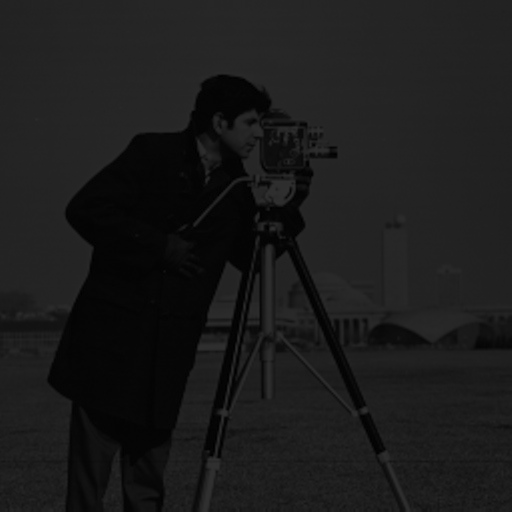

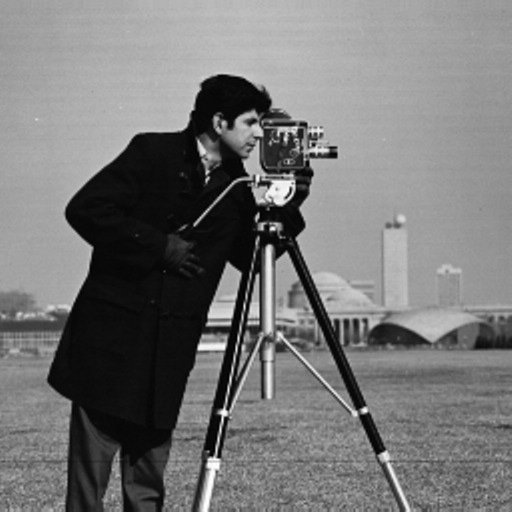

Transformed image with gamma > 1


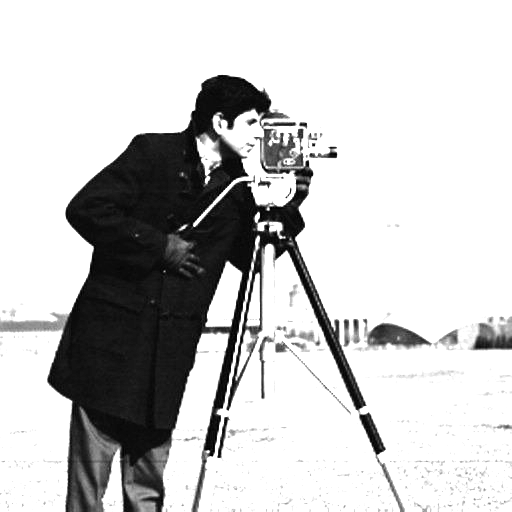

Transformed image with gamma < 1


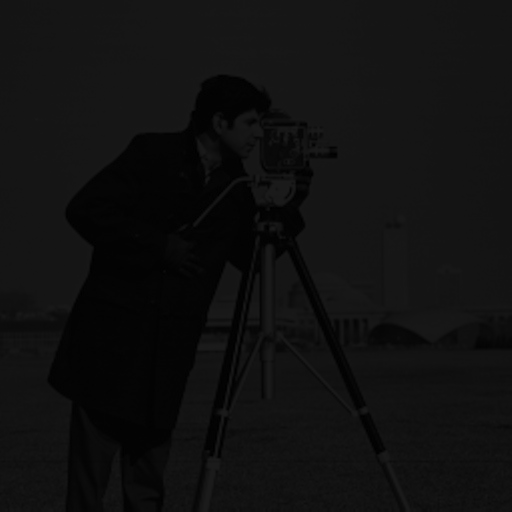

In [ ]:
I = cv2.imread('/content/gdrive/MyDrive/Computer vision/cameraman.jpg',0)
cv2_imshow(I)
J1 = np.zeros((I.shape[0],I.shape[1]));
c = 1
g1 = 1.2
g2 = 0.6
for m in range (0,I.shape[0]):
  for n in range (0,I.shape[1]):
      J1[m,n] = c * I[m,n] ** g1
print("Transformed image with gamma > 1")
cv2_imshow(J1)

J2 = np.zeros((I.shape[0],I.shape[1]));
for m in range (0,I.shape[0]):
  for n in range (0,I.shape[1]):
      J2[m,n] = c * I[m,n] ** g2
print("Transformed image with gamma < 1")
cv2_imshow(J2)



###Exercise 4. Histogram Equalization
The __histogram__ of an image shows how the different pixel values between 0 and 255 are distributed in the image. It gives the count of pixel values falling in different ranges of pixel values. For example, how many pixels with value between 0 and 9 are present? Similarly, how many pixels have values between 10-19, 20-29, and so on upto the last range 250-255. The following figure shows the histogram of an image.

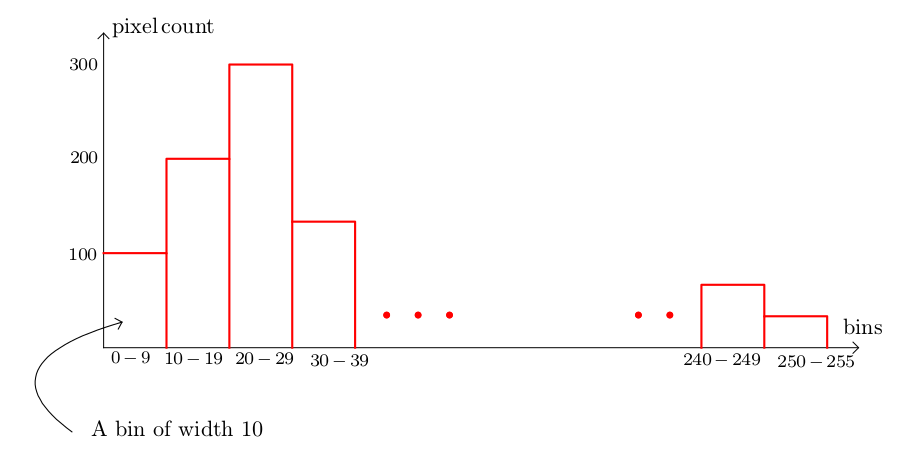

The vertical bar of height $100$ corresponding to the range $0-9$ indicates that, the image contains a total of $100$ pixels whose values lie in the range $0-9$. The count of pixels with values in other ranges, such as, $10-19$, $20-29$ etc. are also shown until the last range $250-255$. Here, a single range, such as, $0-9$ or $10-19$ is called a __bin__. The width of the range is called the __bin width__. Note that, the count of pixels falling in a range depends on the bin width. As the possible intensity values of an image are limited to the range $0-255$, the number of bins that appears on the horizontal axis shown in the above figure depends on the bin width. For example, a bin width of $1$ produces a histogram with $256$ bins, and, a bin width of $256$ produces a histogram with a single bin. We can choose any bin width at our convenience for obtaining a histogram. The sum of counts of pixel values over all bins gives the total number of pixels in the image. This sum yields a value $1$, if the vertical axis is normalized (divided) by the total number of pixels in the image. Thus, a normalized histogram can be seen as the approximate probability density function (pdf) of pixel values. Corresponding to any bin, the histogram gives the probability that a randomly chosen pixel value falls in that bin. The sample histogram of an image is shown below.

In the following Code Cell, write a program to compute and plot the histogram of an image (normalization is not required).


#### Sample histogram
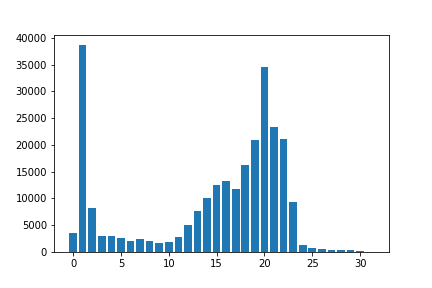

If a histogram has significant amplitude (higher probability) concentrated at the bins corresponding to small pixel values, the image appears to be severely dark. Similarly, if the histogram is concentrated towards large pixel values, the image appears overly bright. If an image appears too dark or bright, it has a poor contrast. The best visual appearance is obtained when an image has good contrast, which happens when the pixel values are almost uniformly distributed in the entire range $0-255$. __Histogram equalization__ refers to a transformation that modifies the pixel intensity values in such a way that, the resulting image has an almost uniform histogram. Thus, the histogram equalization process smashes the concentrated peaks of a histogram into an almost uniform value at every bin.

In the following, we denote the possible values of input intensity levels as $r_k$, where, $k=0,1,...,255$. Each intensity value $r_k$ from the input image is transformed to a corresponding value $s_k$, such that, the resulting image after transformation has an approximately uniform distribution of intensity values.
#### Steps
1. Initialize an output image with same size as that of the input image to be equalized.
2. Compute the normalized histogram of the input image with a bin width of $1$, i.e., compute $P(r_k)$ for every $r_k$, where, $P(.)$ denotes the probability.
2. Iterate through each of the pixels using two nested for loops. If the present pixel value at a position is $r_k$, replace it as $s_k = 255*(\sum_{j=0}^k P(r_k))$

An example input image and it's histogram equalized versions are shown below. Write your code for histogram equalization in the following Code Cell. Display the input and equalized images. Also plot the histograms of the input and equalized images.

#### Input Image
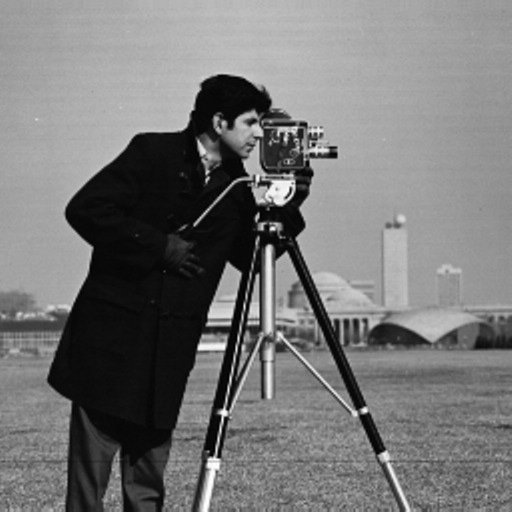

#### Histogram Equalized Image
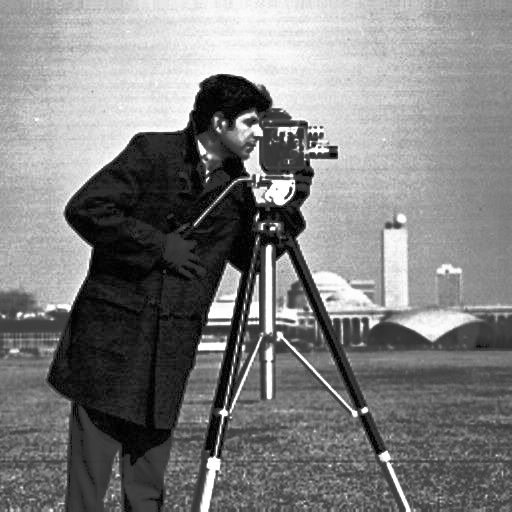

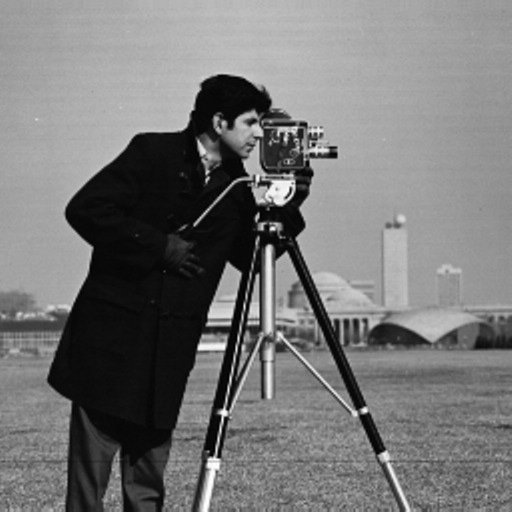

Histogram Equalized Image


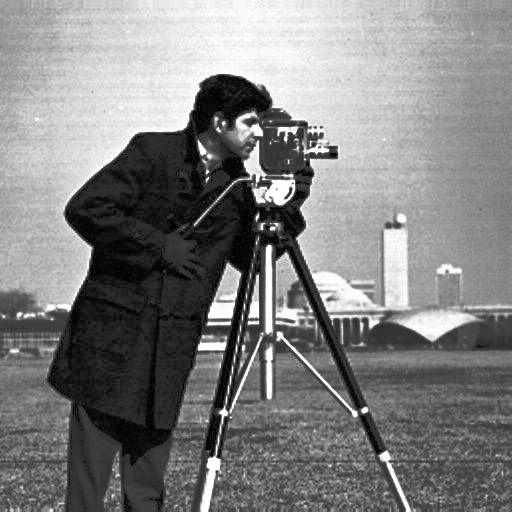

In [ ]:
imvec = cv2.imread('/content/gdrive/MyDrive/Computer vision/cameraman.jpg',0)
cv2_imshow(imvec)
tmp = np.zeros(256)
out_imvec=np.zeros(imvec.shape)
for i in range(len(imvec)):
  for j in range(len(imvec[i])):
    tmp[imvec[i,j]]+=1
prefix = tmp
for i in range(1,len(tmp)):
  prefix[i]+=prefix[i-1]
print("Histogram Equalized Image")
n=imvec.shape[0]*imvec.shape[1]
c=255
prev = 0
for i in range(len(imvec)):
  for j in range(len(imvec[i])):
    out_imvec[i,j]=((c*prefix[imvec[i,j]])/n)
    
cv2_imshow(out_imvec)